In [1]:
# Library Importation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Lasso, LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

QUESTION 2

In [2]:
# Data Importation and preprocessing
tit_data = pd.read_csv("titanic3.csv") # importation of titanic data
tit_data = tit_data.loc[:,['pclass','survived', 'sex', 'age']] # selection of vital fields

tit_data['age'] = tit_data['age'].fillna(tit_data['age'].mean()) # filling the null values with the mean

sex_data = pd.get_dummies(tit_data['sex'], drop_first=True) # 0 is female, 1 is male
sex_data.columns  = ['sex']
tit_data['sex'] = sex_data # conversion of categorical variables to dummy variables

tit_data


,pclass,survived,sex,age
0,1,1,0,29.000000
1,1,1,1,0.920000
2,1,0,0,2.000000
3,1,0,1,30.000000
4,1,0,0,25.000000
...,...,...,...,...
1304,3,0,0,14.500000
1305,3,0,0,29.881138
1306,3,0,1,26.500000
1307,3,0,1,27.000000


In [3]:
# Feature Extraction and Class Extraction
X_data = tit_data.drop('survived', axis=1)
y_data = tit_data['survived']

The image below reflects the decision tree model built on the titanic dataset


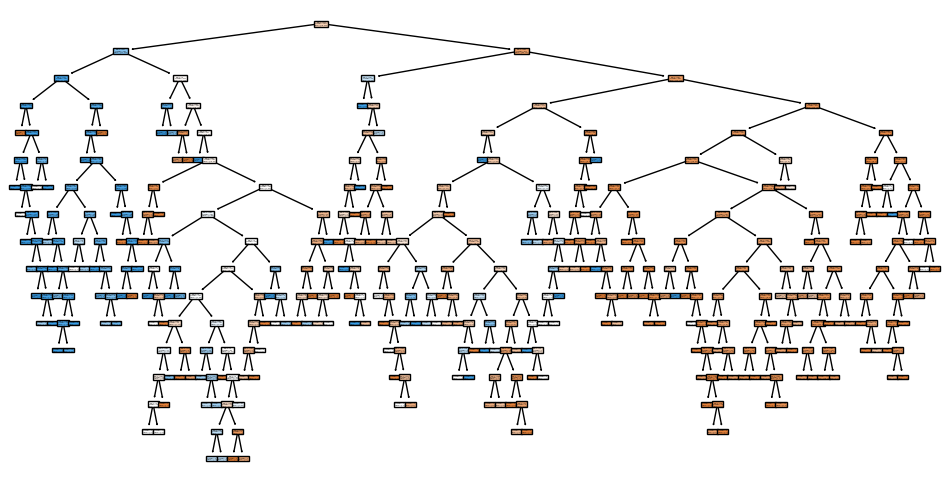

In [4]:
# Decision Tree Model
tree_mod = DecisionTreeClassifier(random_state=0) # Setting initial state of Decision tree Classifier
tree_mod.fit(X_data, y_data) # Fitting of classifier to X and y data
feature_names = list(X_data.columns) # Extracting the name of features
print("The image below reflects the decision tree model built on the titanic dataset")
plt.figure(figsize=(12,6))
tree.plot_tree(tree_mod, feature_names=feature_names, filled=True) # plotting the decision tree model
plt.show()

In [43]:
# Crossvalidation with 10 folds
n_folds = StratifiedKFold(n_splits=10) # setting number of k splits
tree_modcross = DecisionTreeClassifier(random_state=0)
cross_scores = cross_val_score(tree_modcross, X_data, y_data, cv=n_folds)
mean_score = cross_scores.mean()
misclass_error = 1 - mean_score
print(f"Misclassification Error of Decision Tree Model before pruning is: {round(misclass_error, 4)}") # in-sample technique

Misclassification Error of Decision Tree Model before pruning is: 0.2644


In [44]:
# Pruning
alpha_vals = tree_mod.cost_complexity_pruning_path(X_data, y_data)
alpha_vals = alpha_vals['ccp_alphas'] # Get a list of subtrees (pruned trees) with decent alpha values

# Grid Search to tune the ccp_alpha hyperparameter
dict_alpha = {"ccp_alpha":[[alpha_val] for alpha_val in alpha_vals]}
best_alpha_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), scoring = make_scorer(accuracy_score),
                                     param_grid=ParameterGrid(dict_alpha))

best_alpha_search.fit(X_data, y_data) # Fit the data to Grid Search
best_alpha_search.best_params_ # prints the best alpha value

{'ccp_alpha': 0.0010630758327427395}

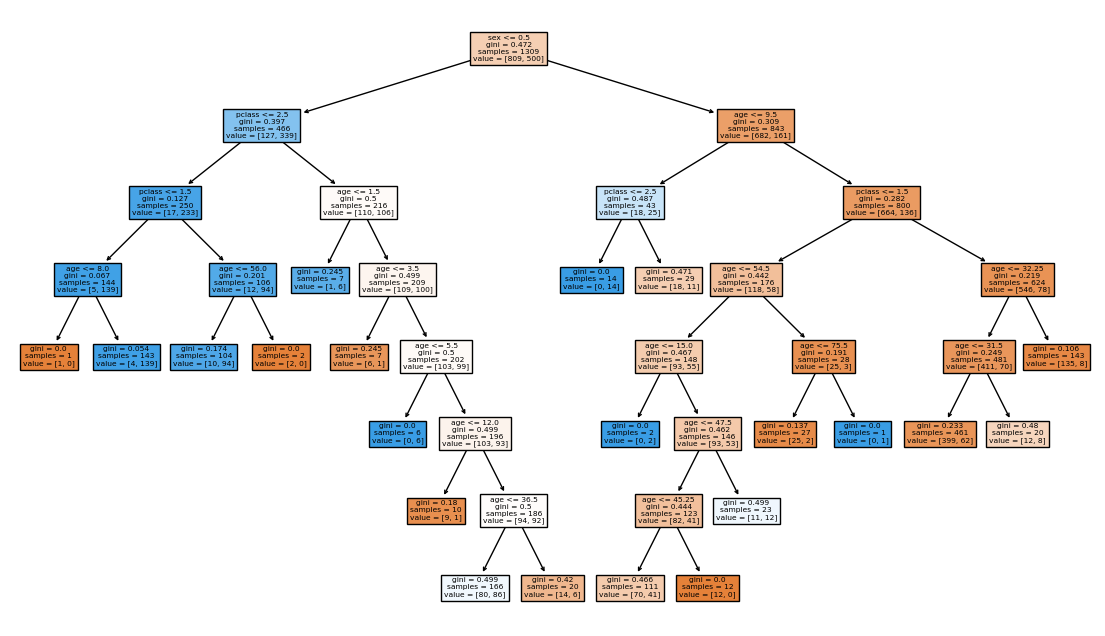

In [45]:
# Selecting best model from pruning
chosen_alpha_treemod = best_alpha_search.best_estimator_
plt.figure(figsize=(14,8))
tree.plot_tree(chosen_alpha_treemod, feature_names=feature_names, filled=True) # plotting of chosen model after pruning
plt.show()

In [47]:
# Crossvalidation with 10 folds for Pruned Model
npruned_folds = StratifiedKFold(n_splits=10)
cross_scores = cross_val_score(chosen_alpha_treemod, X_data, y_data, cv=npruned_folds)
mean_score = cross_scores.mean()
misclass_error_pruned = 1 - mean_score
print(f"Misclassification Error for pruned decision tree is: {round(misclass_error_pruned, 4)}") # Higher error indicates it is not overfitting

Misclassification Error for pruned decision tree is: 0.2537


In [48]:
# Logistic Regression Model
logit_mod = linear_model.LogisticRegression()

#Scaling of Features / Normalization on X
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X_data)

# Design of Logistic Regression Model with crossvalidation
logit_mod.fit(X_scaled, y_data)
nlogit_folds = StratifiedKFold(n_splits=10)
cross_logit_scores = cross_val_score(logit_mod, X_scaled, y_data, cv=nlogit_folds)
mean_logit_score = cross_logit_scores.mean()
misclass_error_logit = 1 - mean_logit_score
print(f"The error for the logistic regression model is: {misclass_error_logit}")

The error for the logistic regression model is: 0.24752201996476808


QUESTION 3

In [49]:
# Data Importation and preprocessing
tit = pd.read_csv("titanic3.csv")
tit = tit.loc[:,['pclass','survived','sex','age']] # selection of vital fields
tit['age'] = tit['age'].fillna(tit['age'].mean()) # filling the null values with the mean
gender = pd.get_dummies(tit['sex'], drop_first=True) # 0 is female, 1 is male
gender.columns  = ['sex']
tit['sex'] = gender # conversion of categorical variables to dummy variables
tit

,pclass,survived,sex,age
0,1,1,0,29.000000
1,1,1,1,0.920000
2,1,0,0,2.000000
3,1,0,1,30.000000
4,1,0,0,25.000000
...,...,...,...,...
1304,3,0,0,14.500000
1305,3,0,0,29.881138
1306,3,0,1,26.500000
1307,3,0,1,27.000000


In [50]:
# Feature Extraction and Class Extraction
X = tit.drop('survived', axis=1)
y = tit['survived']

In [51]:
# Scaling of Features / Normalization on X
std_scaler = StandardScaler()
Xtrain_norm = std_scaler.fit_transform(X)

Xtrain_norm

array([[-1.54609786, -1.34499549, -0.06842049],
       [-1.54609786,  0.74349692, -2.24883736],
       [-1.54609786, -1.34499549, -2.16497518],
       ...,
       [ 0.84191642,  0.74349692, -0.26254593],
       [ 0.84191642,  0.74349692, -0.22372084],
       [ 0.84191642,  0.74349692, -0.06842049]])

Optimal number of K Neighbors is: 8 with a crossvalidation loss of 0.23385789782736344


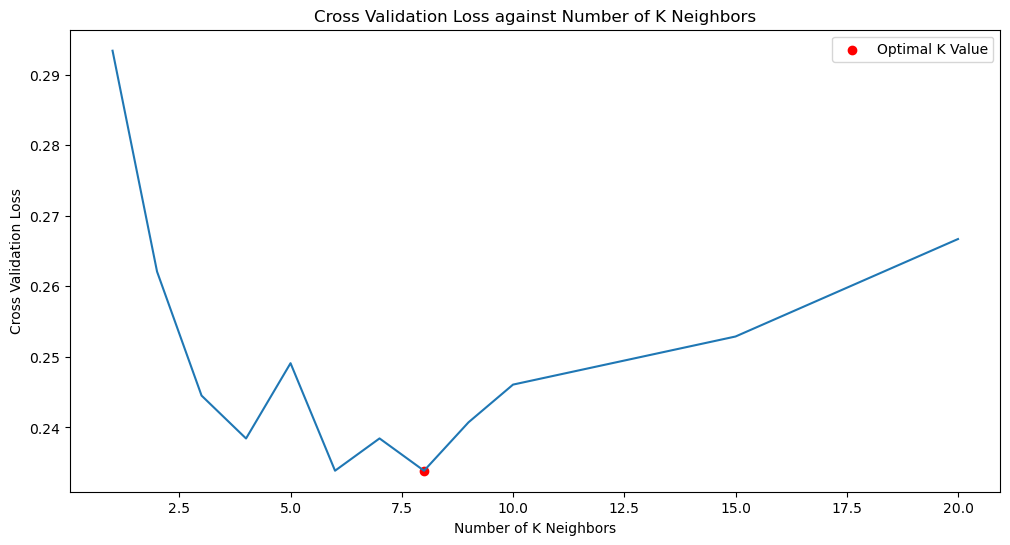

In [52]:
# Computation of Performance of KNN Neighbors with number of Neighbors

cross_score_list = [] # list containing the cross validation score for each neighbor
range_loop = np.array([1,2,3,4,5,6,7,8,9,10,15,20]) # list of k neighbours to evaluate

for i in range_loop:
    knn = KNeighborsClassifier(n_neighbors=i) # initialization of classifier
    knn.fit(X, y) # Fitting of KNN model
    nknn_folds = StratifiedKFold(n_splits=10) # 10 k folds

    # Crossvalidation with i folds for KNN Model
    cross_scores_knn = cross_val_score(knn, Xtrain_norm, y, cv=nknn_folds, scoring = 'accuracy')
    mean_score_knn = cross_scores_knn.mean() # calculating the meann cross_val score
    cross_score_list.append(mean_score_knn)

max_score = max(cross_score_list) # maximum cross_val_score
max_score_idx = cross_score_list.index(max_score) # Getting the position of the corss val score

k_neigh_optimal = max_score_idx+1 # Getting the optimal number of k neighbours

if k_neigh_optimal == 11:
    k_neigh_optimal = 15
elif k_neigh_optimal == 12:
    k_neigh_optimal = 20

print(f"Optimal number of K Neighbors is: {k_neigh_optimal} with a crossvalidation loss of {1-max_score}")


# Matplotlib Plot
plt.figure(figsize=(12,6))
plt.title('Cross Validation Loss against Number of K Neighbors')
plt.scatter(8,1-max_score, color='r', label='Optimal K Value')
plt.xlabel("Number of K Neighbors")
plt.ylabel("Cross Validation Loss")
plt.legend()
plt.plot(range_loop, 1-np.array(cross_score_list)) # 1-cross_score_list is the loss

In [53]:
# KNN Model with Different Metrics
metrics = ['cityblock', 'cosine', 'euclidean', 'manhattan', 'chebyshev']
cross_score_metrics = dict()

for i in metrics:
    knn_metric = KNeighborsClassifier(n_neighbors=k_neigh_optimal, metric=i)
    knn_metric.fit(Xtrain_norm, y) # Fitting the normalized/scaled data to the KNN model

    # Crossvalidation with i folds for KNN Model
    nknn_folds_metric = StratifiedKFold(n_splits=10) # 10 k folds
    cross_scores_knn_metric = cross_val_score(knn_metric, Xtrain_norm, y, cv=nknn_folds_metric)
    mean_score_knn_metric = cross_scores_knn_metric.mean()
    cross_score_metrics[i] = 1 -  mean_score_knn_metric # mean of cross validation loss for each metric

print(cross_score_metrics)
print("\nFrom the above printed values, the best metric is the cosine distance metric.")

{'cityblock': 0.23385789782736344, 'cosine': 0.2154726952436875, 'euclidean': 0.23385789782736344, 'manhattan': 0.23385789782736344, 'chebyshev': 0.23156194950088071}

From the above printed values, the best metric is the cosine distance metric.


In [54]:
# KNN Optimal
k_neigh_optimal # optimal k value
knn_opt = KNeighborsClassifier(n_neighbors=k_neigh_optimal)
knn_opt.fit(Xtrain_norm, y)

# Cross Validation for Optimal KNN
nknn_folds_opt = StratifiedKFold(n_splits=10)
cross_knn_scores_opt= cross_val_score(knn_opt, Xtrain_norm, y, cv=nknn_folds_opt)
mean_knn_score_opt = cross_knn_scores_opt.mean()
misclass_error_opt = 1 - mean_knn_score_opt
print(f"The misclassification error for the Optimal KNN model is: {misclass_error_opt}")

# Logistic Regression Model
# Design of Logistic Regression Model with crossvalidation
logit_mod2 = linear_model.LogisticRegression()
logit_mod2.fit(Xtrain_norm, y)
nlogit_folds2 = StratifiedKFold(n_splits=10)
cross_logit_scores2= cross_val_score(logit_mod2, Xtrain_norm, y, cv=nlogit_folds2)
mean_logit_score2 = cross_logit_scores2.mean()
misclass_error_logit2 = 1 - mean_logit_score2
print(f"The misclassification error for the logistic regression model is: {misclass_error_logit2}")

The misclassification error for the Optimal KNN model is: 0.23385789782736344
The misclassification error for the logistic regression model is: 0.24752201996476808


QUESTION 4

In [55]:
# Data Importation

white_wine = pd.read_csv("winequality-white.csv", sep=';') # importation of white wine
red_wine = pd.read_csv("winequality-red.csv", sep=';') # importation of red wine

red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [56]:
# Generating Mean Data
red_feature_mean = red_wine[list(red_wine.columns)].mean() # Fiding the mean of features for red wine
white_feature_mean = white_wine[list(white_wine.columns)].mean() # Finding the mean of features for white wine

red_feature_mean.name = 'Features'
white_feature_mean.name = 'Features'



# Selection of X and y parameters for both red and white wine
Xwhite_data = white_wine.iloc[:,:-1] 
Xred_data = red_wine.iloc[:, :-1]
yred_data = red_wine.iloc[:,-1]
ywhite_data = white_wine.iloc[:,-1]

                      White Wine   Red Wine
fixed acidity           6.854788   8.319637
volatile acidity        0.278241   0.527821
citric acid             0.334192   0.270976
residual sugar          6.391415   2.538806
chlorides               0.045772   0.087467
free sulfur dioxide    35.308085  15.874922
total sulfur dioxide  138.360657  46.467792
density                 0.994027   0.996747
pH                      3.188267   3.311113
sulphates               0.489847   0.658149
alcohol                10.514267  10.422983
quality                 5.877909   5.636023


Text(0, 0.5, 'Values of Wine Features')

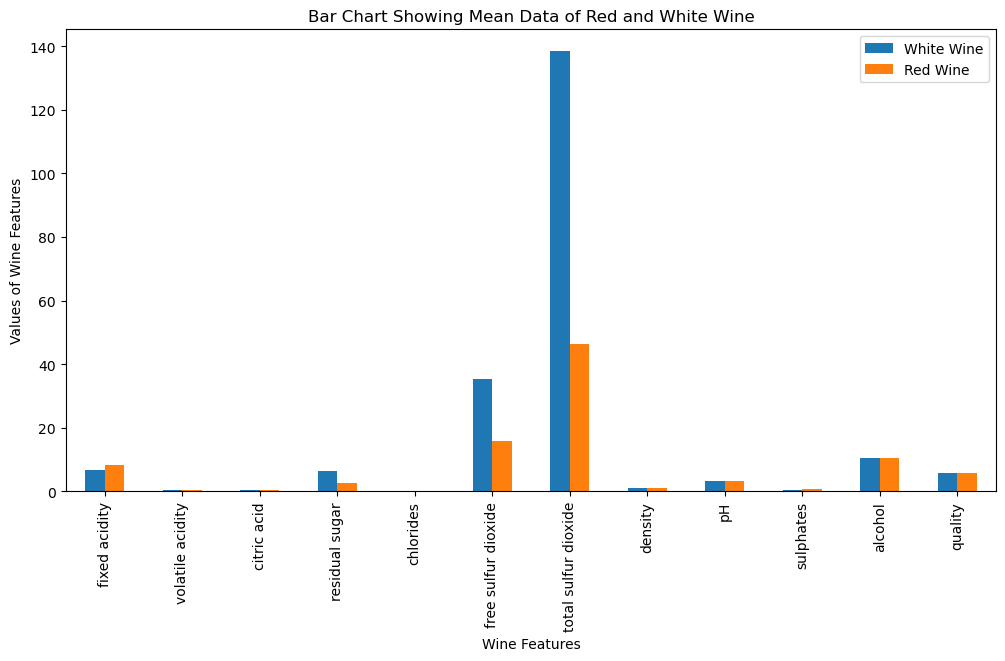

In [57]:
mean_table = pd.concat([white_feature_mean, red_feature_mean], axis=1) # Make a Table consisting of the mean features
mean_table.columns = ['White Wine', 'Red Wine']
print(mean_table)
mean_table.plot.bar(figsize=(12,6)) # Plotting of the mean features for visualization
plt.title("Bar Chart Showing Mean Data of Red and White Wine")
plt.xlabel("Wine Features")
plt.ylabel("Values of Wine Features")

In [58]:
# Correlation Between Features and Independent Variable for White Wine
corr_white = white_wine.corr().iloc[-1,:-1]
corr_white.name = 'Correlation of Features of White Wine to Quality'
print(pd.DataFrame(corr_white))
print('\n')

# Correlation Between Features and Independent Variable for Red Wine
corr_red = red_wine.corr().iloc[-1,:-1]
corr_red.name = 'Correlation of Features of Red Wine to Quality'
print(pd.DataFrame(corr_red))

                      Correlation of Features of White Wine to Quality
fixed acidity                                                -0.113663
volatile acidity                                             -0.194723
citric acid                                                  -0.009209
residual sugar                                               -0.097577
chlorides                                                    -0.209934
free sulfur dioxide                                           0.008158
total sulfur dioxide                                         -0.174737
density                                                      -0.307123
pH                                                            0.099427
sulphates                                                     0.053678
alcohol                                                       0.435575


                      Correlation of Features of Red Wine to Quality
fixed acidity                                               0.124052
volatile

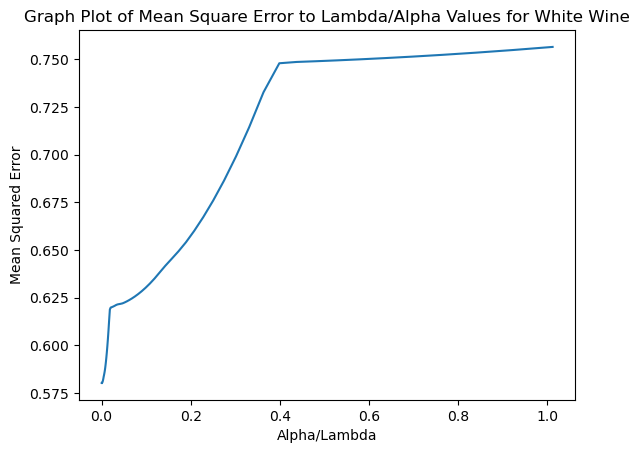

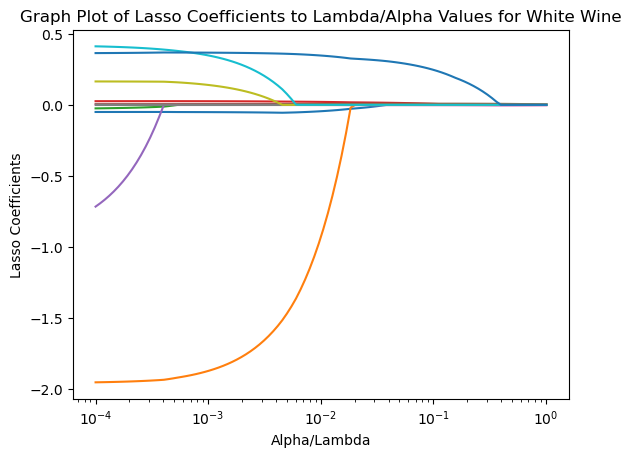

In [59]:
# lASSO MODEL for White Wine
alphas_white = np.logspace(-4, 0.005, 100) # list of possible alpha values
mse_list_white = [] # list of mean square error values
param_est_alpha_white = []

# Red Wine MSE vs Alpha Plot
for i in alphas_white:
    lasso_mod_white = Lasso(alpha =i) # create lasso model
    lasso_mod_white.fit(Xwhite_data, ywhite_data) # fit lasso model
    lasso_folds = KFold(n_splits=10) # use a kfold model

    #   Get mean square error
    mse_score_white = np.abs(cross_val_score(lasso_mod_white, Xwhite_data, ywhite_data, scoring='neg_mean_squared_error', cv=lasso_folds))
    param_est_alpha_white.append(lasso_mod_white.coef_) # Get the coefficients also
    mse_score_mean_white = mse_score_white.mean()
    mse_list_white.append(mse_score_mean_white)


# Plot of MSE to Alphas
plt.plot(alphas_white, mse_list_white)
plt.title("Graph Plot of Mean Square Error to Lambda/Alpha Values for White Wine")
plt.xlabel("Alpha/Lambda")
plt.ylabel("Mean Squared Error")
plt.show()

# Param Estimate Plot for White Wine
ax_white = plt.gca()
ax_white.plot(alphas_white, param_est_alpha_white)
plt.title("Graph Plot of Lasso Coefficients to Lambda/Alpha Values for White Wine")
plt.xlabel("Alpha/Lambda")
plt.ylabel('Lasso Coefficients')
ax_white.set_xscale('log')
plt.show()

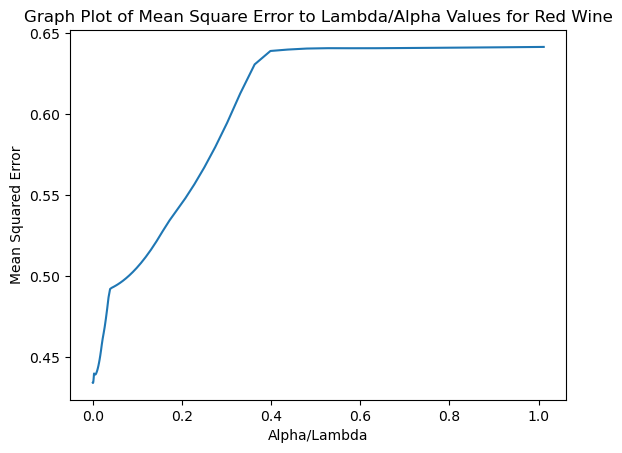

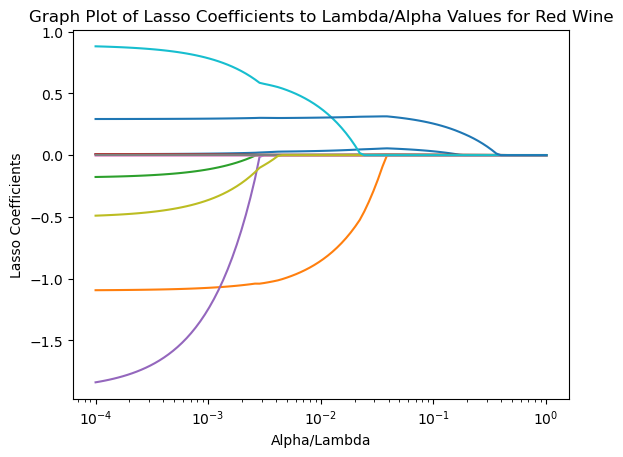

In [60]:
# lASSO MODEL for Red Wine

alphas_red = np.logspace(-4, 0.005, 100) # list of possible alpha values
mse_list = [] # list of mean square error values
param_est_alpha_red = []

# Red Wine MSE vs Alpha Plot
for i in alphas_red:
    lasso_mod = Lasso(alpha =i)
    lasso_mod.fit(Xred_data, yred_data)
    lasso_folds = KFold(n_splits=10)
    mse_score = np.abs(cross_val_score(lasso_mod, Xred_data, yred_data, scoring='neg_mean_squared_error', cv=lasso_folds))
    param_est_alpha_red.append(lasso_mod.coef_)
    mse_score_mean  = mse_score.mean()
    mse_list.append(mse_score_mean)

plt.plot(alphas_red, mse_list)
plt.title("Graph Plot of Mean Square Error to Lambda/Alpha Values for Red Wine")
plt.xlabel("Alpha/Lambda")
plt.ylabel("Mean Squared Error")
plt.show()

# Param Estimate Plot for Red Wine
ax_red = plt.gca()
ax_red.plot(alphas_red, param_est_alpha_red)
plt.title("Graph Plot of Lasso Coefficients to Lambda/Alpha Values for Red Wine")
plt.xlabel("Alpha/Lambda")
plt.ylabel('Lasso Coefficients')
ax_red.set_xscale('log')
plt.show()


In [61]:
# Selection of Features for White Wine with Lasso and CrossValidation of 10
white_knn_mod = LassoCV(cv=10, random_state=0, max_iter=10000) # Building a LassoCV model
white_knn_mod.fit(Xwhite_data, ywhite_data)
white_knn_mod_alpha = white_knn_mod.alpha_ # best alpha value

white_best_mod = Lasso(alpha=white_knn_mod.alpha_) # Getting the best alpha value
white_best_mod.fit(Xwhite_data, ywhite_data) # Fitting the model

chosen_param_red_index = np.where(np.abs(white_best_mod.coef_)>0)
chosen_white_params = white_best_mod.feature_names_in_[chosen_param_red_index] # Getting chosen parameters for red wine
print(f"The chosen parameters for white wine consists of: {chosen_white_params}")

The chosen parameters for white wine consists of: ['fixed acidity' 'volatile acidity' 'residual sugar' 'free sulfur dioxide'
 'total sulfur dioxide' 'alcohol']


In [62]:
# Selection of Features for Red Wine with Lasso and CrossValidation of 10
red_knn_mod = LassoCV(cv=10, random_state=0, max_iter=10000) # Building a LassoCV model
red_knn_mod.fit(Xred_data, yred_data)
red_knn_mod_alpha = red_knn_mod.alpha_ # best alpha value

red_best_mod = Lasso(alpha=red_knn_mod.alpha_) # Getting the best alpha value
red_best_mod.fit(Xred_data, yred_data) # Fitting the model

chosen_param_red_index = np.where(np.abs(red_best_mod.coef_)>0)
chosen_red_params = red_best_mod.feature_names_in_[chosen_param_red_index] # Getting chosen parameters for red wine
print(f"The chosen parameters for red wine consists of: {chosen_red_params}")

The chosen parameters for red wine consists of: ['fixed acidity' 'volatile acidity' 'free sulfur dioxide'
 'total sulfur dioxide' 'sulphates' 'alcohol']


In [63]:
# Construction of KNN Regression Model for Red Wine

num_neighbors = np.arange(1,21, dtype=int) # number of neighbors 1 to 20
num_neighbors_dict = {'n_neighbors': [n_neigh for n_neigh in num_neighbors]}

best_knn_red_grid = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=num_neighbors_dict, scoring=make_scorer(mean_squared_error, greater_is_better=False)
                            , cv = 10) # Trying to perform hyperparameter tuning

best_knn_red_grid.fit(Xred_data[chosen_red_params], yred_data) 
best_knn_red_model = best_knn_red_grid.best_estimator_ # Getting the best KNN model
best_param = best_knn_red_grid.best_params_ # Getting best KNN model params

# Fitting KNN Model with best number of neighbours
knn_red = KNeighborsRegressor(n_neighbors=best_param['n_neighbors'])
knn_red.fit(Xred_data[chosen_red_params], yred_data)

KNeighborsRegressor(n_neighbors=19)

In [64]:
# Construction of Linear Regression Model
linear_mod = LinearRegression()
linear_mod.fit(Xred_data[chosen_red_params], yred_data)

LinearRegression()

In [65]:
# Cross Validation for KNN Red Wine
red_knn_scores_mse= cross_val_score(knn_red, Xred_data[chosen_red_params], yred_data, cv=10, scoring=make_scorer(mean_squared_error))
red_knn_scores_r2= cross_val_score(knn_red, Xred_data[chosen_red_params], yred_data, cv=10, scoring=make_scorer(r2_score))
mean_red_mse = red_knn_scores_mse.mean()
mean_red_r2 = red_knn_scores_r2.mean()

print(f"MSE for KNN: {mean_red_mse}")
print(f"R2 score for KNN: {mean_red_r2}")

MSE for KNN: 0.5691327048380634
R2 score for KNN: 0.04048729651447545


In [42]:
# Cross Validation for Linear Regression Model
linreg_scores_mse= cross_val_score(linear_mod, Xred_data[chosen_red_params], yred_data, cv=10, scoring=make_scorer(mean_squared_error))
linreg_scores_r2= cross_val_score(linear_mod, Xred_data[chosen_red_params], yred_data, cv=10, scoring=make_scorer(r2_score))
mean_linreg_mse = linreg_scores_mse.mean()
mean_linreg_r2 = linreg_scores_r2.mean()

print(f"MSE for Linear Regression Model: {mean_linreg_mse}")
print(f"R2 score for Linear Regression Model: {mean_linreg_r2}")

MSE for Linear Regression Model: 0.43801930858650034
R2 score for Linear Regression Model: 0.23368325039178367
